In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
df = pd.read_csv(r"C:\Users\joy\Desktop\Sea Level\data\csiro_alt_gmsl_mo_2015_csv_edited.csv")
df['id'] = df.index
time = df.index
series = df.GMSL

In [3]:
#prepearing dataset
split_time = 180
xTrain = time[:split_time]
yTrain = series[:split_time]
xTest = time[split_time:]
yTest = series[split_time:]

In [4]:
#function for calculating moving average
def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

In [5]:
moving_avg = moving_average_forecast(series, 10)[split_time - 10:]

<IPython.core.display.Javascript object>


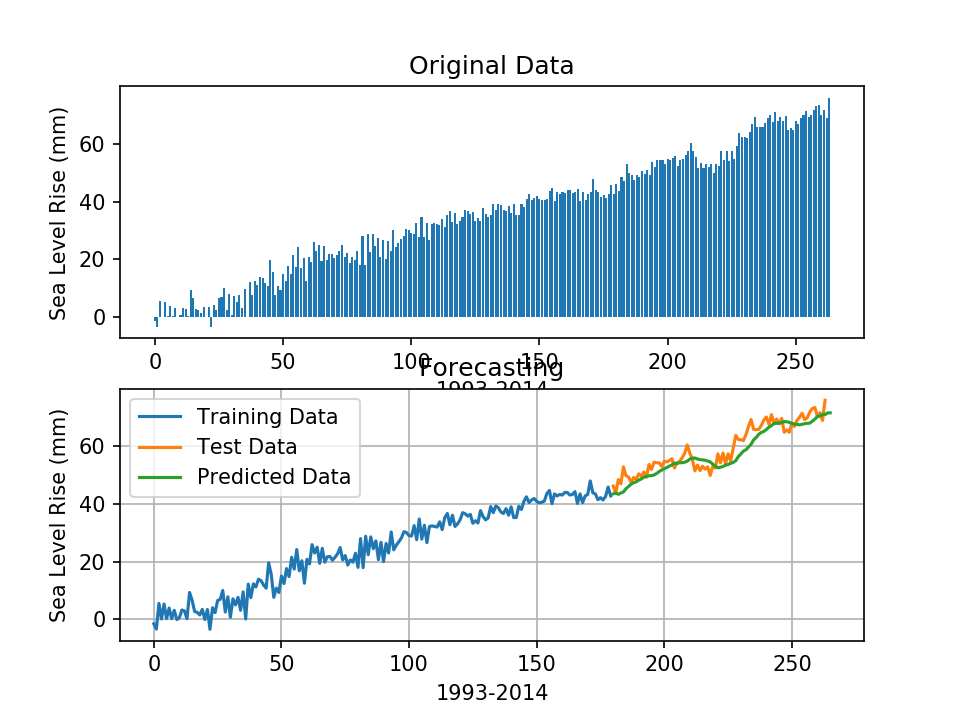

In [7]:
%matplotlib notebook
fig, axs = plt.subplots(2)
plt.grid(True)

axs[0].bar(time, series, alpha=1)
axs[0].set(ylabel='Sea Level Rise (mm)', xlabel='1993-2014', title="Original Data")

axs[1].plot(xTrain, yTrain, label='Training Data')
axs[1].plot(xTest, yTest, label='Test Data')
axs[1].plot(xTest, moving_avg, label='Predicted Data')
axs[1].legend(loc='upper left', frameon=True)
axs[1].set(ylabel='Sea Level Rise (mm)', xlabel='1993-2014', title="Forecasting")

plt.show()

<IPython.core.display.Javascript object>


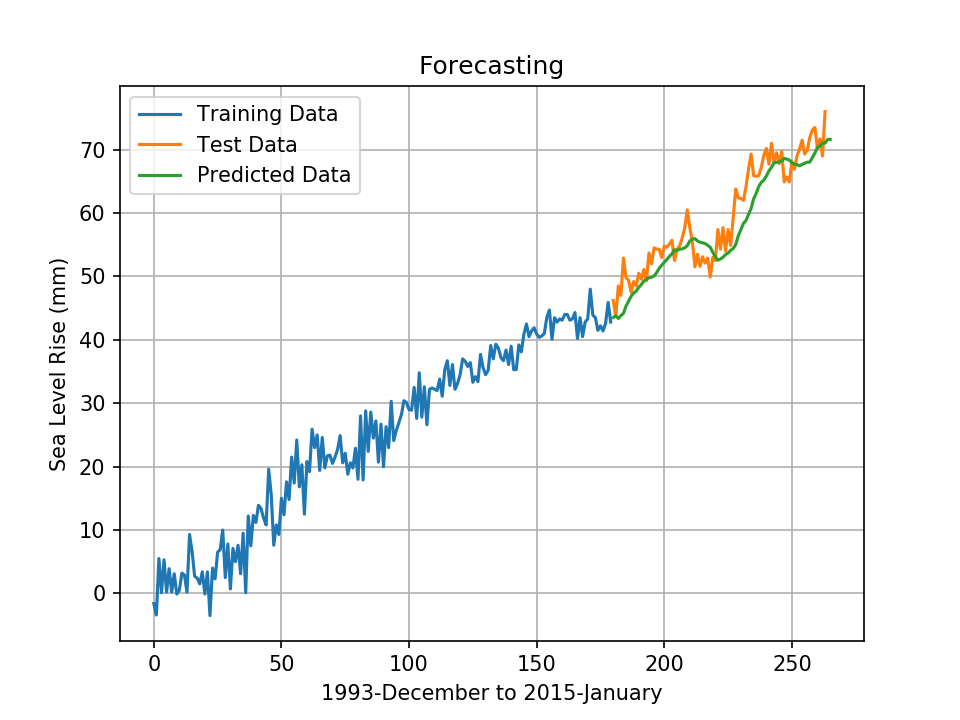

In [8]:
%matplotlib notebook
fig, axs = plt.subplots(1)
plt.grid(True)
axs.plot(xTrain, yTrain, label='Training Data')
axs.plot(xTest, yTest, label='Test Data')
axs.plot(xTest, moving_avg, label='Predicted Data')
axs.legend(loc='upper left', frameon=True)
axs.set(ylabel='Sea Level Rise (mm)', xlabel='1993-December to 2015-January', title="Forecasting")

plt.show()

In [11]:
errors = moving_avg - yTest
abs_errors = np.abs(errors)
mae = abs_errors.mean()
print("Mean Absolute Error" ,mae)

Mean Absolute Error 2.821785714285717
